In [ ]:
# this can take some time

# run only on the first time, other times it will load from local at kaggle

#!pip install autogluon --target=/kaggle/working/mysitepackages

In [2]:
import sys
sys.path.append('/kaggle/working/mysitepackages')

In [3]:
from autogluon.tabular import TabularPredictor,TabularDataset
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm
tqdm.pandas()

import warnings
import shutil
warnings.filterwarnings('ignore')

from pathlib import Path

# **Loading Datasets**

In [4]:
path = Path('/kaggle/input/playground-series-s4e5/')
train = pd.read_csv(path / 'train.csv', index_col='id')
test  = pd.read_csv(path / 'test.csv', index_col='id')
sub = pd.read_csv(path / 'sample_submission.csv', index_col='id')

# Shape of data
print(f'Training data shape: {train.shape}')
print(f'Testing data shape: {test.shape}')
print(f'Submission data shape: {sub.shape}')

Training data shape: (1117957, 21)
Testing data shape: (745305, 20)
Submission data shape: (745305, 1)


In [5]:
train.head().T

id,0,1,2,3,4
MonsoonIntensity,5.000,6.00,6.00,3.000,5.000
TopographyDrainage,8.000,7.00,5.00,4.000,3.000
RiverManagement,5.000,4.00,6.00,6.000,2.000
Deforestation,8.000,4.00,7.00,5.000,6.000
Urbanization,6.000,8.00,3.00,4.000,4.000
ClimateChange,4.000,8.00,7.00,8.000,4.000
DamsQuality,4.000,3.00,1.00,4.000,3.000
Siltation,3.000,5.00,5.00,7.000,3.000
AgriculturalPractices,3.000,4.00,4.00,6.000,3.000
Encroachments,4.000,6.00,5.00,8.000,3.000


In [6]:
train.describe()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,4.949230e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,2.083324e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.800000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


In [7]:
sub.head()

,FloodProbability
id,
1117957,0.5
1117958,0.5
1117959,0.5
1117960,0.5
1117961,0.5


In [8]:
test.head().T

id,1117957,1117958,1117959,1117960,1117961
MonsoonIntensity,4,4,1,2,6
TopographyDrainage,6,4,3,4,3
RiverManagement,3,2,6,4,2
Deforestation,5,9,5,6,4
Urbanization,6,5,7,4,6
ClimateChange,7,5,2,5,4
DamsQuality,8,4,4,4,5
Siltation,7,7,6,3,5
AgriculturalPractices,8,5,4,4,3
Encroachments,4,4,2,4,7


# **Visualizing Data**

0it [00:00, ?it/s]

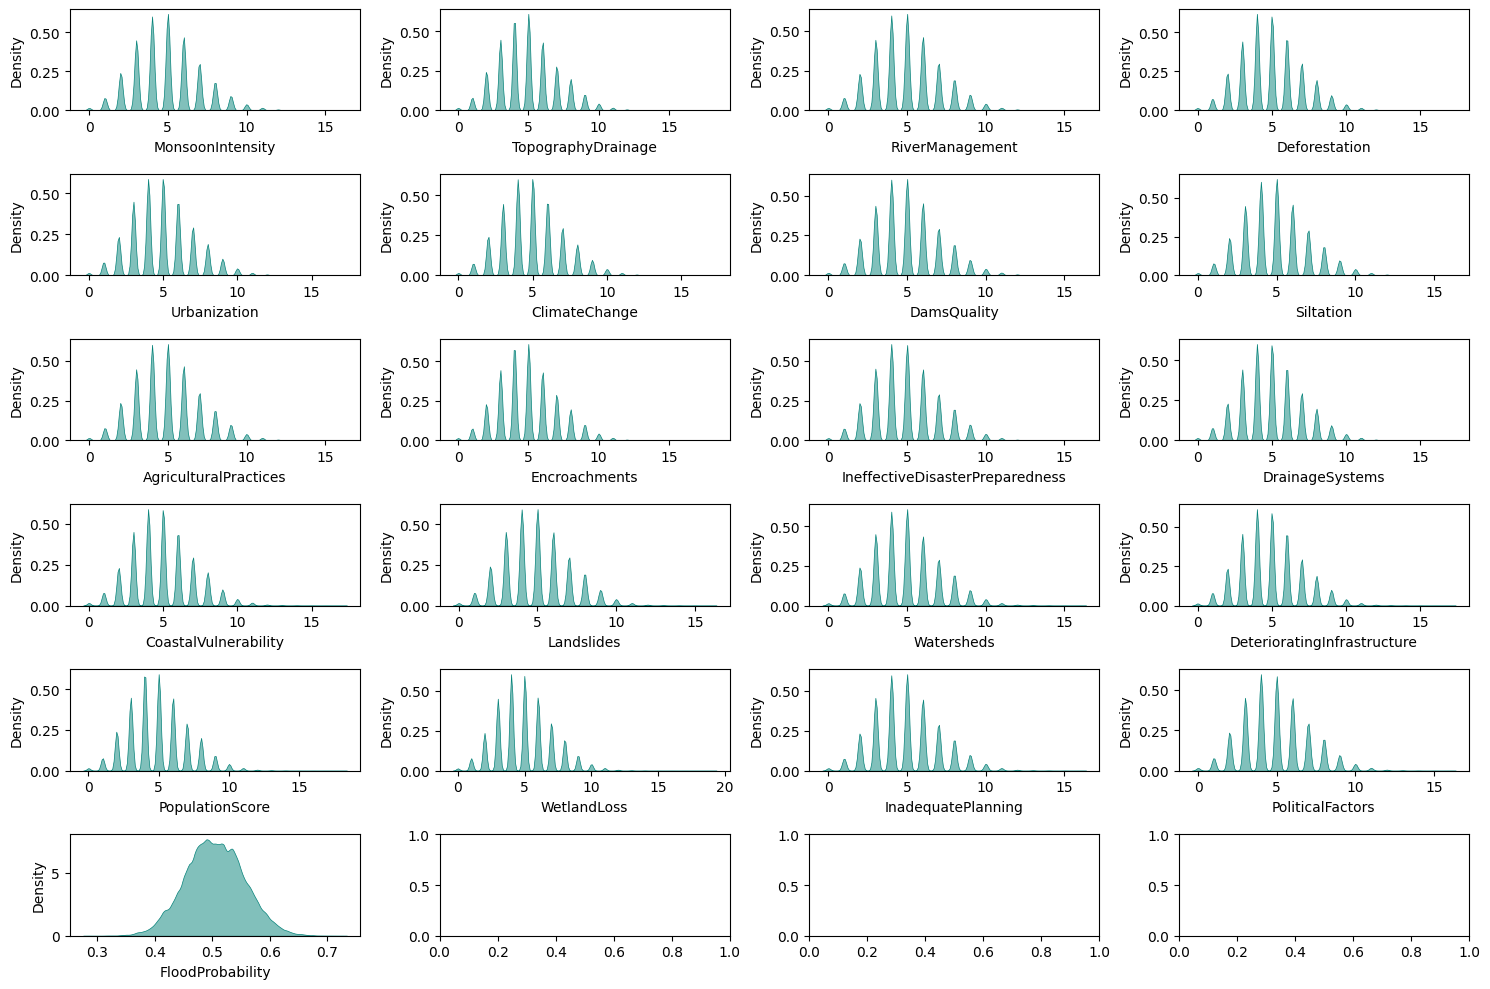

In [10]:
numeric_columns = train.select_dtypes(include=['float64', 'int64']).columns

fig, axs = plt.subplots(nrows = int(np.ceil(len(numeric_columns)/4)), ncols = 4)

axs = axs.flatten()
fig.set_size_inches(15, 10)

for i, col in tqdm(enumerate(numeric_columns)):
    sns.kdeplot(numeric_columns[col], ax=axs[i], fill=True, alpha=0.5, linewidth=0.5,
                color='#058279', label='Train')

plt.tight_layout()
plt.show()

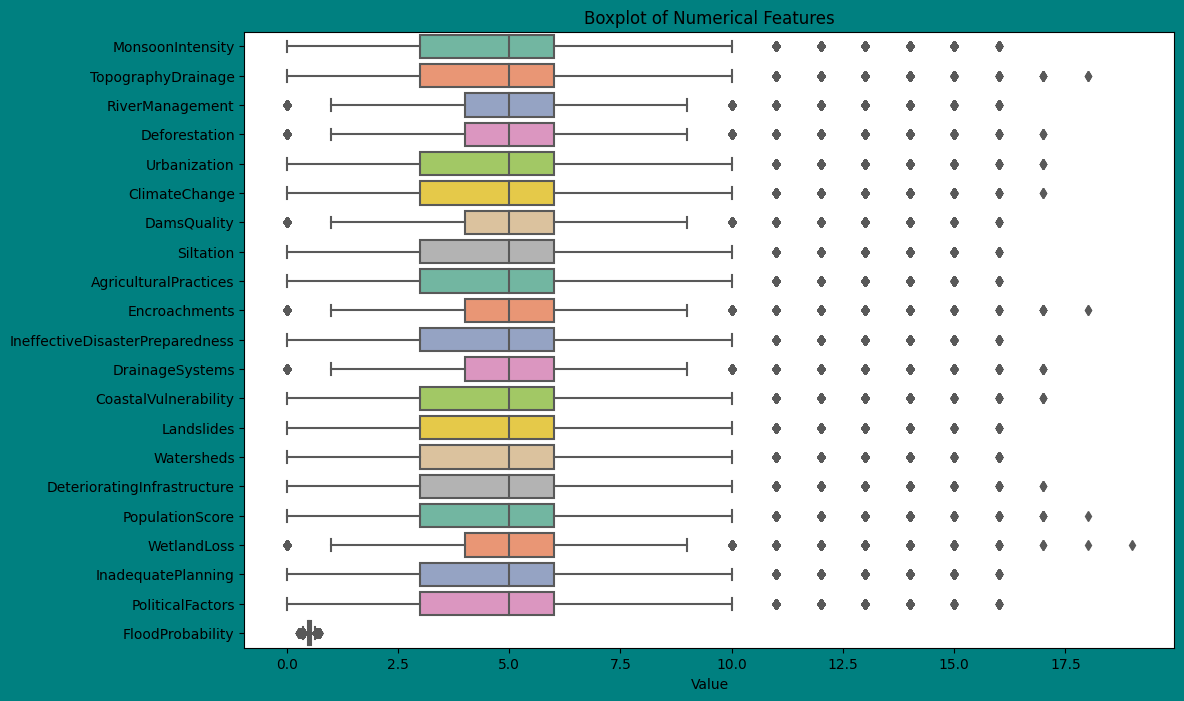

In [12]:
numeric_features = train.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=train[numeric_features], orient="h", palette="Set2")
plt.title('Boxplot of Numerical Features')
plt.xlabel('Value')
plt.gcf().set_facecolor('#008080')
plt.show()

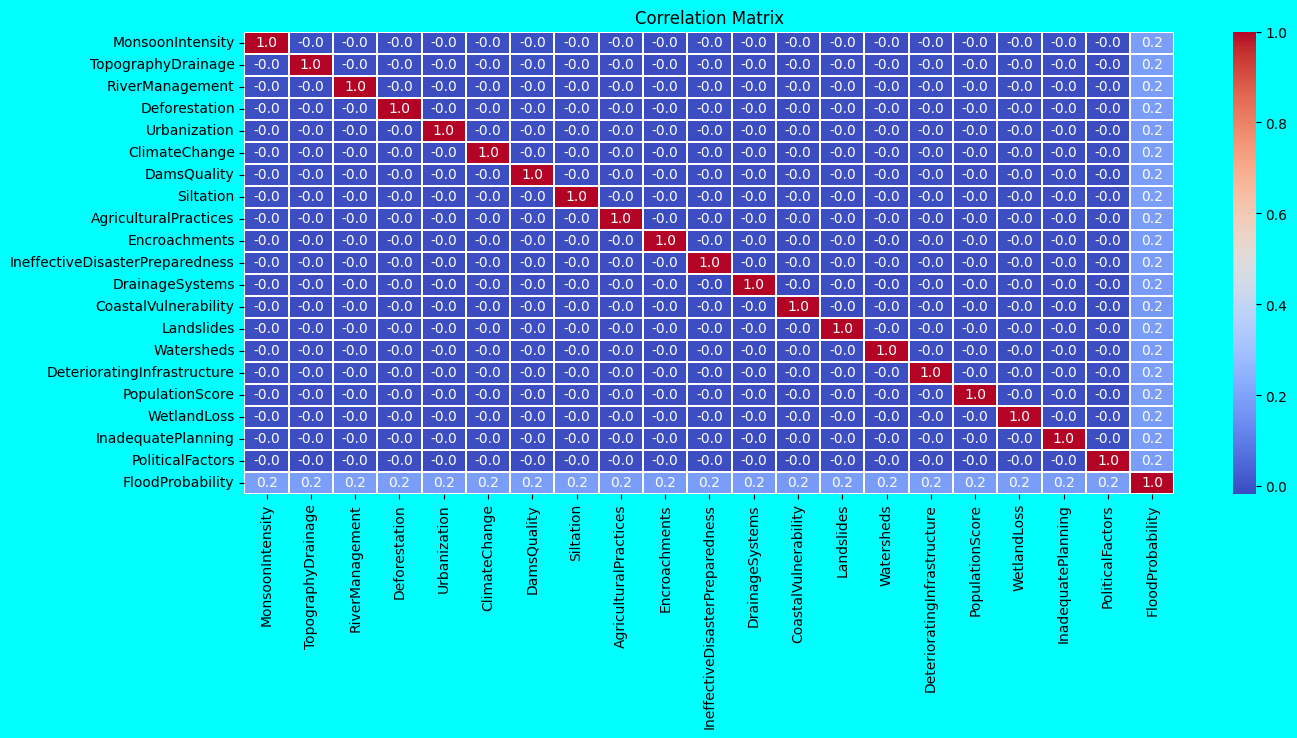

In [5]:
corr_matrix = train.select_dtypes(include=['float','int']).corr()
plt.figure(figsize=(15, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.2)
plt.gcf().set_facecolor('#00FFFF')  
plt.title('Correlation Matrix')
plt.show()

# Observations from plots and tables
* Dataset consists 21 columns. 20 features with integer values and 1 target variable with float64 data type.
* All 20 features have the same **median** value as **5**
* **Mean** value of all features are **just under of 5** and **standart dev**iations varies between **2.05~2.10**
* **Mean** of our target variable (**FloodProbability**) is approximately **0.504**. **Median** is **0.50**5 with **std of 0.0510**
* The dataset does not have any missing values.
* The features do not have any observable correlation between each other. But, all of the features have some level of correlation with target variable that i hope, i can work on that.
